![Astrofisica Computacional](../logo.PNG)

---

Eduard Larrañaga (ealarranaga@unal.edu.co)

---

---
# Ejercicios 02. Métodos Numéricos Básicos II

## A. Ley de Desplazamiento de Wien

La ley de radiación de Planck establece que la intensidad $I$ de la radiación por unidad de área y por unidad de longitud de onda $\lambda$ de un cuerpo negro con una temperatura $T$ es
\begin{equation}
    I(\lambda ) = \frac{2\pi h c^2 \lambda^{-5}}{e^{\frac{hc}{\lambda k_B T}}-1}
\end{equation}
donde $h$ es la constante de Planck, $c$ es la rapidez de la luz en el vacio y $k_B$ es la constante de Boltzmann.

---

1. Escriba una función que grafique la intensidad de Planck en función de $\lambda$ para una temperatura $T$ dada.

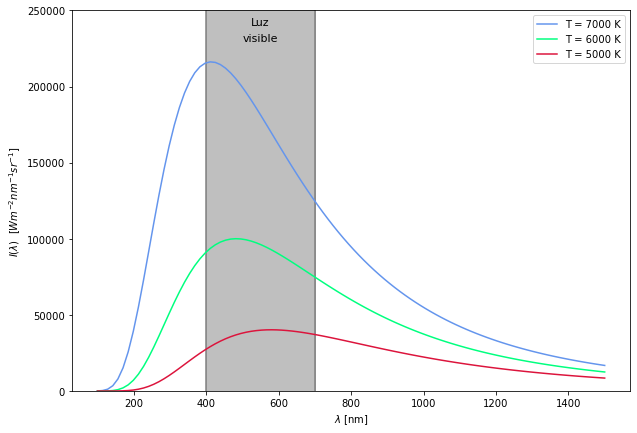

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import astropy.units as u
from astropy import constants as const

def I(l,T):
    '''
    ------------------------------------------
    I(l,T)
    ------------------------------------------
    Returns the energy density for a photon 
    gas in units of W meter^-2 nm^-2
    Arguments:
    l: wavelength in units of nm
    T: temperature of the gas in K
    ------------------------------------------
    '''
    numer = (2*np.pi*const.h*const.c**2)/(l**5)
    denom = np.exp(const.h*const.c/(l*const.k_B*T)) - 1
    return (numer/denom).to('W/(m^2 nm)')




l_range = np.linspace(100,1500,100)

fig, ax = plt.subplots(figsize=(10,7))
ax.plot(l_range,I(l_range*u.nm,7000*u.K), color='cornflowerblue', label='T = 7000 K')
ax.plot(l_range,I(l_range*u.nm,6000*u.K), color='springgreen', label='T = 6000 K')
ax.plot(l_range,I(l_range*u.nm,5000*u.K), color='crimson', label='T = 5000 K')

ax.vlines(400, 0, 250000, color='grey')
ax.vlines(700, 0, 250000, color='grey')
ax.axvspan(400, 700, alpha=0.5, color='grey')
ax.text(524, 240000, r'Luz', fontsize=11)
ax.text(500, 230000, r'visible', fontsize=11)

ax.set_ylim(0, 2.5e5)
ax.set_xlabel(r'$\lambda$ [nm]')
ax.set_ylabel(r'$I(\lambda)$  $[W m^{-2}nm^{-1}sr^{-1}]$')
ax.legend()
plt.show()

---
2. Utilice la derivada de esta expresión para mostrar que la longitud de onda $\lambda_m$ en la que se tiene el máximo de la intensidad satisface la ecuación
    \begin{equation}
        5 e^{-\frac{hc}{\lambda_m k_B T}} + \frac{hc}{\lambda_m k_B T} - 5 = 0.
    \end{equation}

**Solución.** Para encontrar la derivada utilizamos la libreria `sympy`. 

In [2]:
from sympy import *

lmbda = symbols('\lambda')
T = symbols('T')
h,c,k = symbols('h c k_B')

expr = (2*pi*h*c**2/lmbda**5)/(exp(h*c/(lmbda*k*T)) -1)
expr

2*pi*c**2*h/(\lambda**5*(exp(c*h/(T*\lambda*k_B)) - 1))

In [3]:
derI = diff(expr,lmbda)
derI

-10*pi*c**2*h/(\lambda**6*(exp(c*h/(T*\lambda*k_B)) - 1)) + 2*pi*c**3*h**2*exp(c*h/(T*\lambda*k_B))/(T*\lambda**7*k_B*(exp(c*h/(T*\lambda*k_B)) - 1)**2)

In [4]:
factor(derI)

2*pi*c**2*h*(-5*T*\lambda*k_B*exp(c*h/(T*\lambda*k_B)) + 5*T*\lambda*k_B + c*h*exp(c*h/(T*\lambda*k_B)))/(T*\lambda**7*k_B*(exp(c*h/(T*\lambda*k_B)) - 1)**2)

Los terminos dentro del parentesis en el numerador dan como resultado la condición del punto máximo:
\begin{equation}
-5T \lambda_m k_B e^{\frac{hc}{\lambda_m k_B T}} +5\lambda_m k_B T + hc e^{\frac{hc}{\lambda_m k_B T}} =0 
\end{equation}

\begin{equation}
-5T \lambda_m k_B  +5\lambda_m k_B T e^{-\frac{hc}{\lambda_m k_B T}} + hc  =0 
\end{equation}

\begin{equation}
-5  +5 e^{-\frac{hc}{\lambda_m k_B T}} + \frac{hc}{ \lambda_m k_B T}  =0 
\end{equation}

\begin{equation}
5 e^{-\frac{hc}{\lambda_m k_B T}} + \frac{hc}{ \lambda_m k_B T} -5  =0 .
\end{equation}


---
3. Realice la sustitución $x = \frac{hc}{\lambda_m k_B T}$ para mostrar que la longitud de onda correspondiente al máximo de intensidad satisface la \textit{Ley de Desplazamiento de Wien},
    \begin{equation}
        \lambda_m = \frac{b}{T} 
    \end{equation}
    donde $b = \frac{hc}{k_B x}$ y $x$ es la solución de la ecuación no-lineal
    \begin{equation}
        5 e^{-x} + x - 5 = 0.
    \end{equation}

**Solución.** 

Utilizando la definición de $x = \frac{hc}{\lambda_m k_B T}$  se obtiene la ecuación que debe satisfacer la variable $x$,

\begin{equation}
5 e^{-\frac{hc}{\lambda_m k_B T}} + \frac{hc}{ \lambda_m k_B T} -5  =0 
\end{equation}

\begin{equation}
5 e^{-x} + x -5  = 0. 
\end{equation}

Adicionalmente, de la definición de la variable $x$ se obtiene la relación que define la ubicación del máximo como

\begin{equation}
\lambda_m = \frac{hc}{x k_B T} = \frac{b}{T}
\end{equation}

donde se ha definido $b = \frac{hc}{x k_B}$

---
4. Escriba un programa que resuelva la ecuación para $x$ con una tolerancia de $\epsilon = 10^{-6}$ utilizando el método de busqueda binaria (bisección) y con ello encuentre el coeficiente $b$ en la ley de desplazamiento.

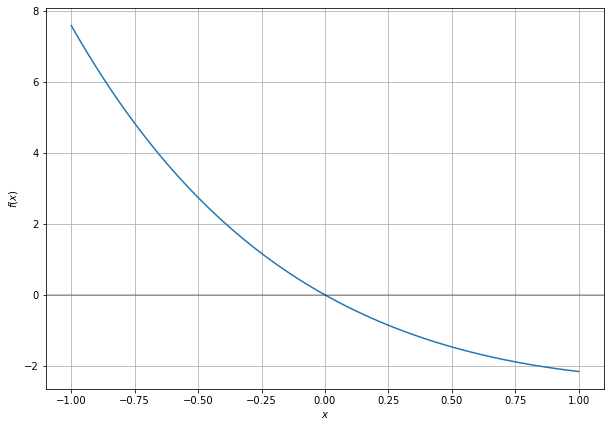

In [5]:
def f(x):
    return 5*np.exp(-x) + x - 5

x_range = np.linspace(-1,1,100)

plt.figure(figsize=(10,7))
plt.plot(x_range, f(x_range))
plt.axhline(0, color='black', alpha=0.3)
plt.xlabel(r'$x$')
plt.ylabel(r'$f(x)$')
plt.grid()
plt.show()

In [6]:
def bisection(f, a, b, epsilon=1e-6):
    '''
    Bisection Method for finding a root
    --------------------------------------------
    Arguments:
    f: Function 
    a,b: Boundaries of the interval to begin the
         search of the root
    epsilon: tolerance for the root
    --------------------------------------------
    Dependeces: NumPy
    --------------------------------------------
    '''
    c = (a + b)/2
    while np.abs(f(c)) > epsilon:
        c = (a + b)/2
        if f(a)*f(c) < 0:
            b = c
        else:
            a = c
    root = c
    return root, f(root)

x_r, fx_r = bisection(f, 4, 6)
print(f'La raíz es x_r = {x_r:.8f}')
print(f'para la cual la función interpolada da un valor de f(x_r) =  {f(x_r):.8e}')




La raíz es x_r = 4.96511459
para la cual la función interpolada da un valor de f(x_r) =  3.49141255e-07


El valor de la constante en la Ley de Desplazamiento de Wien será:

In [7]:
b = const.h*const.c/(x_r*const.k_B)
b

<Quantity 0.00289777 K m>

Este resultado concuerda con el reportado en la literatura. Ver:  [Wikipedia. Wien's displacement law](https://en.wikipedia.org/wiki/Wien%27s_displacement_law)